In [ ]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyFTS.common import Util as cUtil
from pyFTS.benchmarks import benchmarks as bchmk

from pyFTS.models import pwfts

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

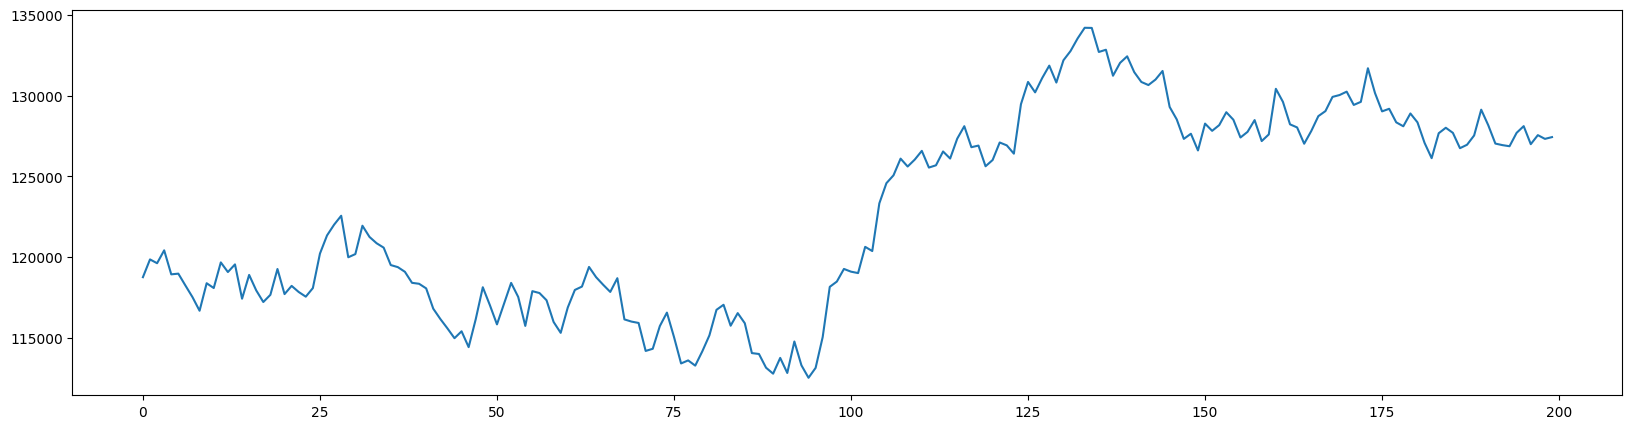

In [30]:
#Univariate time series
data = pd.read_csv('BVSP.csv', sep=',', compression='infer')
# data = np.array(teste['Close'])
# data


train = data['Close'].values[:200]
test = data['Close'].values[200:]

#Multivariate time series
import pandas as pd
data['Date'] = pd.to_datetime(data["Date"], format='%Y-%m-%d')
train_mv = data.iloc[:2000]
test_mv = data.iloc[2000:]

#Data visualization
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=[20,5])
plt.plot(train)
pass

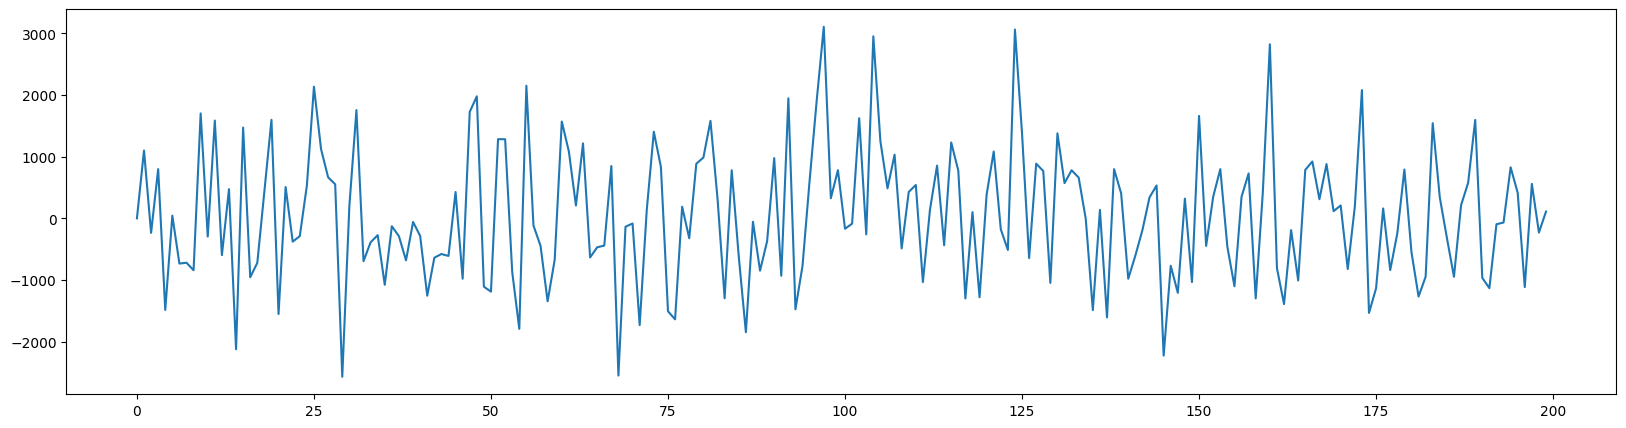

In [31]:
from pyFTS.common import Transformations
diff = Transformations.Differential(1)
fig = plt.subplots(figsize=[20,5])
plt.plot(diff.apply(train), label="glo_avg")
pass

c:\Dev\notebooks\.venv\lib\site-packages\pyFTS\partitioners\partitioner.py:239: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


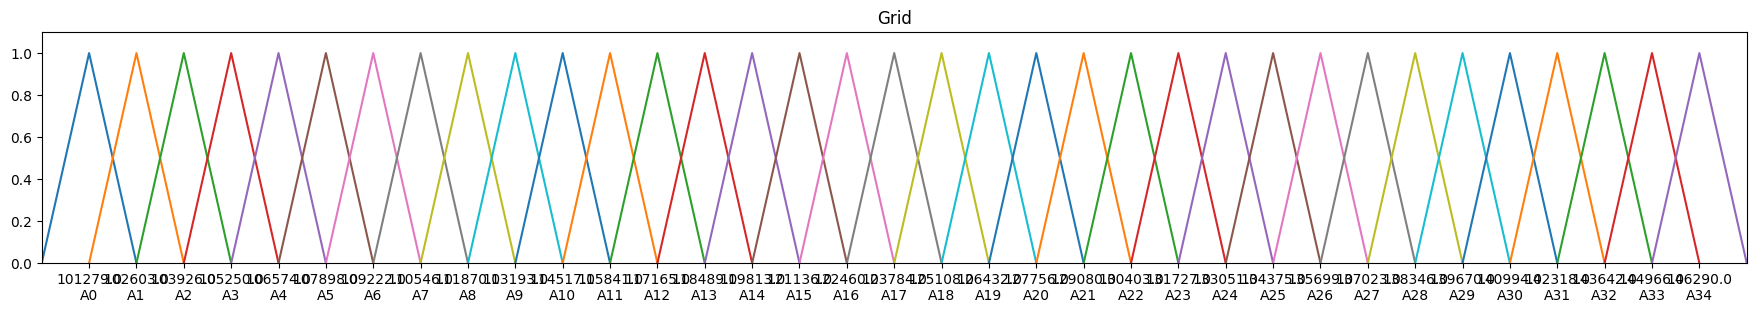

In [32]:
from pyFTS.partitioners import Grid
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[22,3])
part = Grid.GridPartitioner(data=train,npart=35)
part.plot(ax)

In [33]:
from pyFTS.common import FuzzySet as fz
F = fz.fuzzyfy_series(train, part.sets)
print(F)

['A13', 'A14', 'A14', 'A14', 'A13', 'A13', 'A13', 'A12', 'A12', 'A13', 'A13', 'A14', 'A13', 'A14', 'A12', 'A13', 'A13', 'A12', 'A12', 'A14', 'A12', 'A13', 'A13', 'A12', 'A13', 'A14', 'A15', 'A16', 'A16', 'A14', 'A14', 'A16', 'A15', 'A15', 'A15', 'A14', 'A14', 'A13', 'A13', 'A13', 'A13', 'A12', 'A11', 'A11', 'A10', 'A11', 'A10', 'A11', 'A13', 'A12', 'A11', 'A12', 'A13', 'A12', 'A11', 'A13', 'A12', 'A12', 'A11', 'A11', 'A12', 'A13', 'A13', 'A14', 'A13', 'A13', 'A13', 'A13', 'A11', 'A11', 'A11', 'A10', 'A10', 'A11', 'A12', 'A10', 'A9', 'A9', 'A9', 'A10', 'A10', 'A12', 'A12', 'A11', 'A12', 'A11', 'A10', 'A10', 'A9', 'A9', 'A9', 'A9', 'A10', 'A9', 'A9', 'A9', 'A10', 'A13', 'A13', 'A14', 'A13', 'A13', 'A15', 'A14', 'A17', 'A18', 'A18', 'A19', 'A18', 'A19', 'A19', 'A18', 'A18', 'A19', 'A19', 'A20', 'A20', 'A19', 'A19', 'A18', 'A19', 'A20', 'A19', 'A19', 'A21', 'A22', 'A22', 'A23', 'A23', 'A22', 'A23', 'A24', 'A24', 'A25', 'A25', 'A24', 'A24', 'A23', 'A23', 'A24', 'A23', 'A22', 'A22', 'A22', '

In [34]:
from pyFTS.common import FLR
rules = FLR.generate_non_recurrent_flrs(F)
print([str(k) for k in rules[0:10]])

['A13 -> A14', 'A14 -> A14', 'A14 -> A13', 'A13 -> A13', 'A13 -> A12', 'A12 -> A12', 'A12 -> A13', 'A14 -> A12', 'A12 -> A14', 'A14 -> A15']


In [35]:
from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=part)
model.fit(train)
print(model)

Conventional FTS:
A9 -> A10,A9
A10 -> A10,A11,A12,A13,A9
A11 -> A10,A11,A12,A13
A12 -> A10,A11,A12,A13,A14
A13 -> A11,A12,A13,A14,A15
A14 -> A12,A13,A14,A15,A16,A17
A15 -> A14,A15,A16
A16 -> A14,A15,A16
A17 -> A18
A18 -> A18,A19
A19 -> A18,A19,A20,A21
A20 -> A19,A20,A21,A22
A21 -> A20,A21,A22,A23
A22 -> A21,A22,A23
A23 -> A21,A22,A23,A24
A24 -> A23,A24,A25
A25 -> A24,A25



In [36]:
from pyFTS.common import FuzzySet as fz
f = fz.get_maximum_membership_fuzzyset(130000, part.sets)
print(f)

A22: trimf([129079.55999999987, 130403.40571428557, 131727.2514285713])


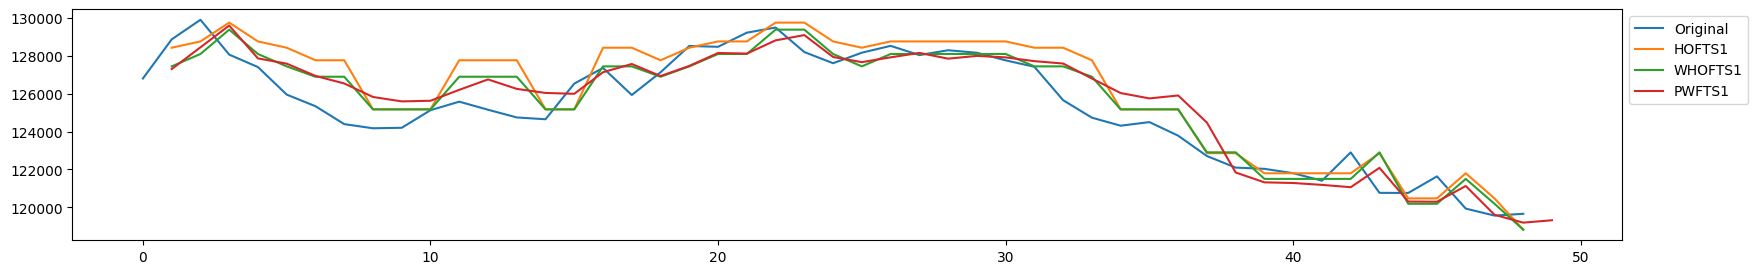

In [46]:
from pyFTS.common import Util
from pyFTS.models import hofts, pwfts
import numpy as np

models = []
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[20,3])
ax.plot(test[:100], label='Original')
rows = []
for method in [hofts.HighOrderFTS , hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]:    #hofts.HighOrderFTS , hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
  for order in [1, 3, 5]:
    model = method(partitioner=part, order=order)
    model.shortname += str(order)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(order):
      forecasts.insert(0,None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    del(model)
handles, labels = ax.get_legend_handles_labels()
gd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

In [ ]:
forecasts

# part 2


c:\Dev\notebooks\.venv\lib\site-packages\pyFTS\partitioners\partitioner.py:239: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


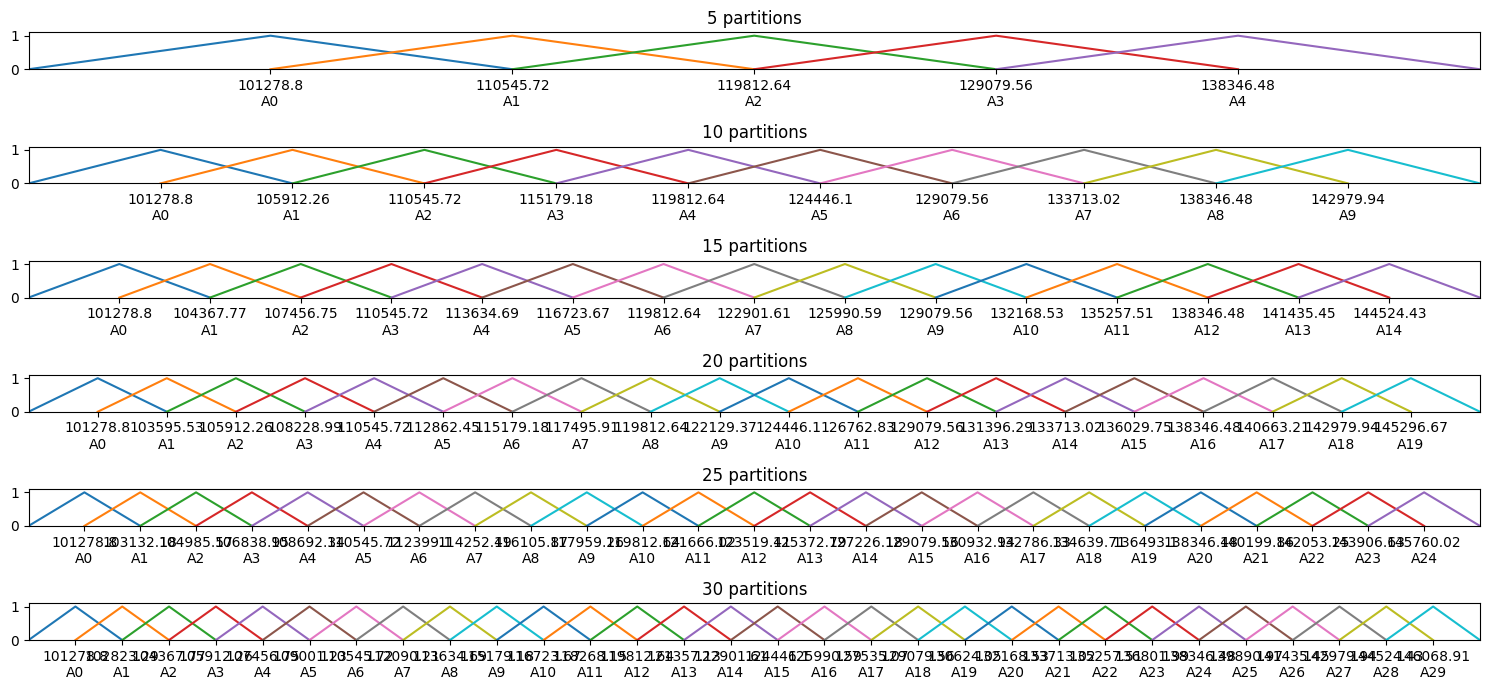

In [48]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []

fig, ax = plt.subplots(nrows=6, ncols=1,figsize=[15,7])


for ct, npart in enumerate(np.arange(5,35,5)):
  part = Grid.GridPartitioner(data=train, npart=npart)
  part.name = str(npart) + " partitions"
  
  part.plot(ax[ct], rounding=2)
 
plt.tight_layout()

# avaliação do desempenho dado o metodo de peso e numero de partições

,Partitions,RMSE,MAPE,U
0,5,1115.02,0.69,1.22
1,15,1503.95,1.00,1.64
2,25,1258.91,0.84,1.38
3,35,1177.36,0.79,1.29


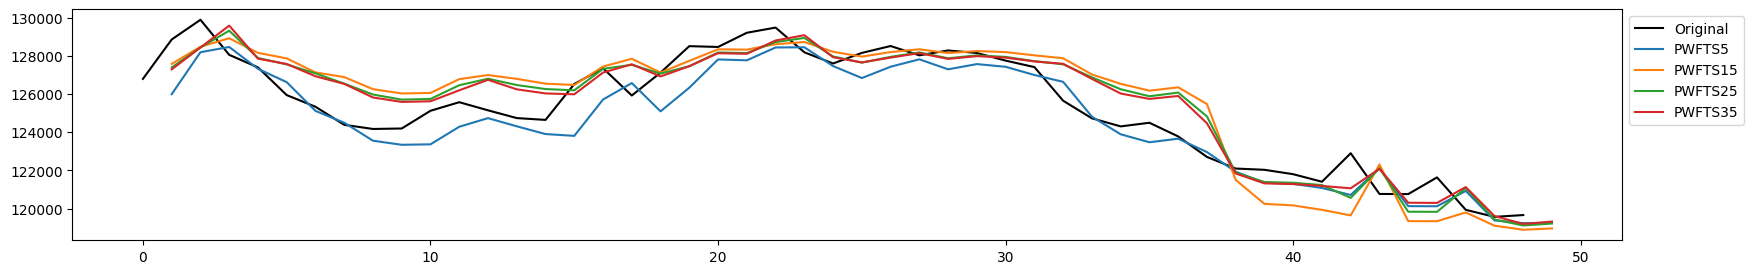

In [61]:

from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[20,3])

ax.plot(test[:100], label='Original',color='black')

rows = []
order =1
for method in [pwfts.ProbabilisticWeightedFTS ]:    #hofts.HighOrderFTS , hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
  for npart in np.arange(5,45,10):
    part = Grid.GridPartitioner(data=train,npart=npart)
    model = method(partitioner=part, order=1)
    model.shortname += str(npart)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(1):
      forecasts.insert(0,None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    rmse, mape, u = Measures.get_point_statistics(test, model)
  
    rows.append([npart, rmse, mape, u])
    del(model)
handles, labels = ax.get_legend_handles_labels()
gd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Partitions','RMSE','MAPE','U'])



,Order,RMSE,MAPE,U
0,1,1115.02,0.69,1.22
1,3,1575.24,1.03,1.79
2,5,2055.69,1.29,2.37


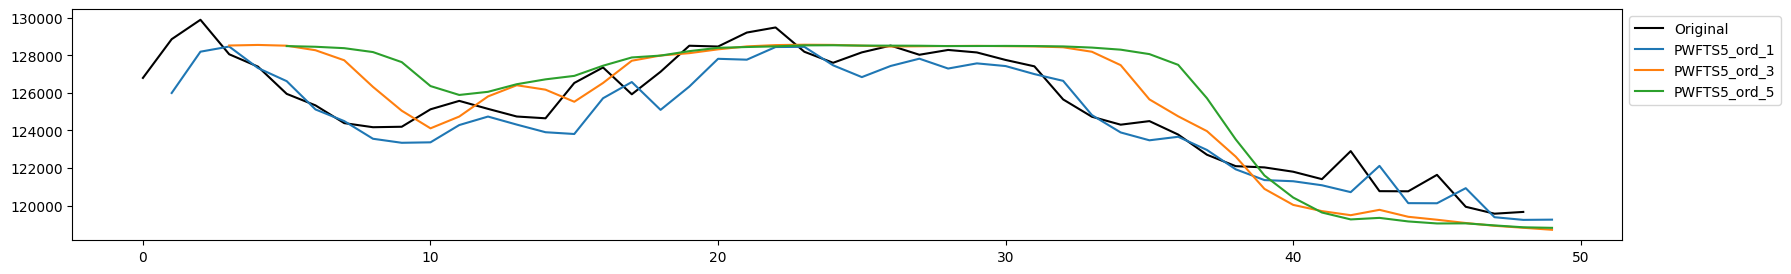

In [62]:

from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[20,3])

ax.plot(test[:100], label='Original',color='black')

rows = []
order =1
for method in [pwfts.ProbabilisticWeightedFTS ]:    #hofts.HighOrderFTS , hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
  for npart in [5]:
    part = Grid.GridPartitioner(data=train,npart=npart)
    for order in [1,3,5]:
        model = method(partitioner=part, order=order)
        model.shortname += str(npart)
        model.shortname += f"_ord_{str(order)}"
        model.fit(train)
        forecasts = model.predict(test)
        for k in np.arange(order):
            forecasts.insert(0,None)
        ax.plot(forecasts[:100], label=model.shortname)
        models.append(model.shortname)
        Util.persist_obj(model, model.shortname)
        rmse, mape, u = Measures.get_point_statistics(test, model)
  
        rows.append([order, rmse, mape, u])
        del(model)
handles, labels = ax.get_legend_handles_labels()
gd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Order','RMSE','MAPE','U'])

,Order,RMSE,MAPE,U
0,1,1151.43,0.75,1.25
1,3,1171.34,0.76,1.33
2,5,1094.24,0.69,1.26


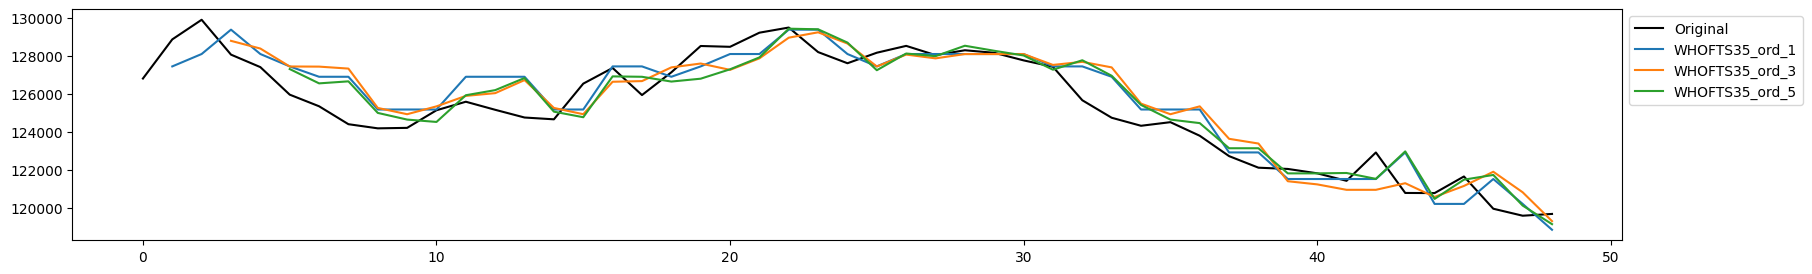

In [64]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
rows = []


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[20,3])

ax.plot(test[:100], label='Original',color='black')

rows = []
order =1
for method in [hofts.WeightedHighOrderFTS ]:    #hofts.HighOrderFTS , hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS
  for npart in [35]:
    part = Grid.GridPartitioner(data=train,npart=npart)
    for order in [1,3,5]:
        model = method(partitioner=part, order=order)
        model.shortname += str(npart)
        model.shortname += f"_ord_{str(order)}"
        model.fit(train)
        forecasts = model.predict(test)
        for k in np.arange(order):
            forecasts.insert(0,None)
        ax.plot(forecasts[:100], label=model.shortname)
        models.append(model.shortname)
        Util.persist_obj(model, model.shortname)
        rmse, mape, u = Measures.get_point_statistics(test, model)
  
        rows.append([order, rmse, mape, u])
        del(model)
handles, labels = ax.get_legend_handles_labels()
gd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Order','RMSE','MAPE','U'])

In [ ]:
for npart in np.arange(5,35,5):
  part = Grid.GridPartitioner(data=y, npart=npart)
  model = hofts.HighOrderFTS(order=1, partitioner=part)
  model.fit(data)
  forecasts = model.predict(y)
    
  ax.plot(forecasts[:-1], label=str(npart) + " partitions")
  
  rmse, mape, u = Measures.get_point_statistics(y, model)
  
  rows.append([npart, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Partitions','RMSE','MAPE','U'])